In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [3]:
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [4]:
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.cos(2*np.pi*t)
    IC_loss = net(t_0) - one

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

In [5]:
train_t = (np.random.rand(30)*2).reshape(-1, 1)
print(train_t ,NN)

[[0.23687381]
 [1.06633302]
 [0.70918071]
 [0.1745238 ]
 [0.05705409]
 [1.03692937]
 [0.57110574]
 [1.40596308]
 [0.30355608]
 [0.82020604]
 [0.34968818]
 [0.92598994]
 [0.82445895]
 [0.73233551]
 [0.67052442]
 [1.04609333]
 [1.82671951]
 [0.81006477]
 [0.53738117]
 [0.95086638]
 [0.52521656]
 [1.66707918]
 [1.75921753]
 [0.900686  ]
 [0.43076398]
 [0.70676645]
 [1.58066914]
 [0.87896659]
 [0.83610697]
 [1.66613558]] <keras.engine.sequential.Sequential object at 0x000001C999C66130>


1.5874269
0.45462567
0.27800688
0.052747015
0.0039534583
0.0027996702


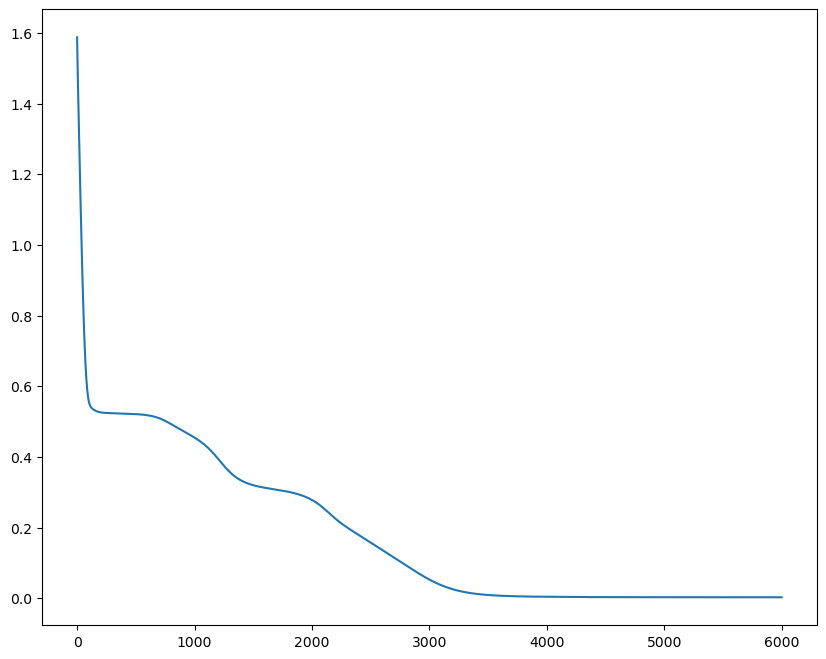

In [7]:
train_t = (np.random.rand(30)*2).reshape(-1, 1)
train_loss_record = []

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

plt.figure(figsize = (10,8))
plt.plot(train_loss_record)
plt.show()

In [13]:
test_t = np.linspace(0, 2, 100)

train_u = np.sin(2*np.pi*train_t)/(2*np.pi) + 1
true_u = np.sin(2*np.pi*test_t)/(2*np.pi) + 1
print(test_t)
pred_u = NN.predict(test_t).ravel()
print(pred_u)

#plt.figure(figsize = (10,8))
#plt.plot(train_t, train_u, 'ok', label = 'Train')
#plt.plot(test_t, true_u, '-k',label = 'True')
#plt.plot(test_t, pred_u, '--r', label = 'Prediction')
#plt.legend(fontsize = 15)
#plt.xlabel('t', fontsize = 15)
#plt.ylabel('u', fontsize = 15)
#plt.show()

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

In [8]:
t_0 = tf.zeros((1,1))
print(t_0)

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [10]:
print(test_t)

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

In [3]:
-0.0042040714285714285*0.0281

-0.00011813440714285714

In [4]:
0.004339750000000001*0.0281-0.000091020

3.0926975000000016e-05

In [8]:
vl = -0.0001192152 / 0.0282
print(vl)

-0.0042274893617021275


In [10]:
vr = (0.0000324229+0.0000910203) / 0.0282
print(vr)

0.004377418439716312


C:\Users\SongChihun\AppData\Local\Temp\ipykernel_24384\469857012.py:17: RuntimeWarning: invalid value encountered in sqrt
  y = yc + np.sqrt(r**2 - (x - xc)**2)


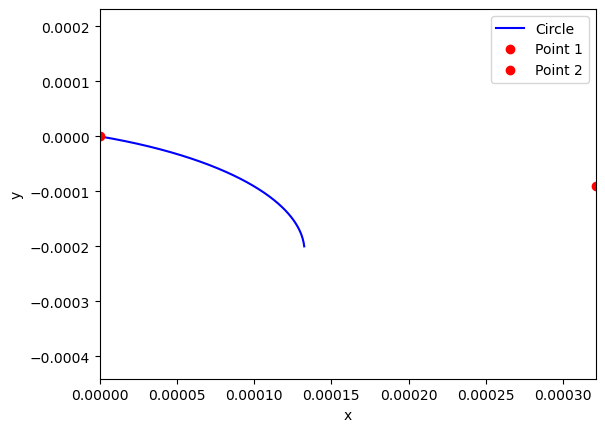

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a1 = 0.0
a2 = 0.321/1000
b1 = 0.0
b2 = -0.0000910203
xc = -0.00009899662236288189
yc = -0.00020933714516341
# Define the x-range of the plot
xmin, xmax = a1, a2
x = np.linspace(xmin, xmax, 1000)

# Calculate the radius of the circle
r = np.sqrt((xc - a1)**2 + (yc - b1)**2)

# Calculate the y-values of the circle
y = yc + np.sqrt(r**2 - (x - xc)**2)

# Plot the circle
plt.plot(x, y, 'b-', label='Circle')

# Plot the two points above the circle
plt.plot(a1, b1, 'ro', label='Point 1')
plt.plot(a2, b2, 'ro', label='Point 2')

# Add axis labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set the x-limits and y-limits of the plot
plt.xlim(xmin, xmax)
plt.ylim(yc - r, np.max([b1, b2]) + r)

# Show the plot
plt.show()